# Phân tích dữ liệu bán hàng của 12 tháng sau đó thống kê dữ liệu thành các biểu đồ
 1. What was the best month for sales ? How much was earned that month ?
    (Tháng nào là tháng có doanh thu tốt nhất ? Doanh thu tháng đó là bao nhiêu ?)
 2. Which city sold the most product ?
    (Thành phố nào bán doanh thu tốt nhất ?)
 3. What time should we display advertisements to maximize the likelihood of customer's buying product ?
    (Thời điểm nào trong ngày nên chạy quảng cáo để tối đa hóa khả năng khách hàng sẽ mua sản phẩm ?)

### Mô tả sơ qua về file dữ liệu : 
* File dữ liệu gồm có 6 cột đó là :
  1. Order ID.
  2. Product.
  3. Quantity Ordered.
  4. Price Each.
  5. Order Date.
  6. Purchase Address.
* Trong đó các cột đều bị chứa các dữ liệu lỗi hoặc missing cần được giải quyết.
* Nhiệm vụ cần làm đó là làm sạch dữ liệu ,sau đó phân tích và cuối cùng là trực quan hóa dữ liệu thành dạng các biểu đồ dễ hiểu.

In [547]:
# Importing
# Khai báo các thư viện cần sử dụng Pandas, Matplotlib, Numpy, Seaborn,os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [430]:
path = "Data"
os.listdir(path)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [396]:
# Nhập 12 file dữ liệu vào
files = ['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [431]:
# Nối 12 file dữ liệu lại với nhau
year_data = pd.DataFrame()
relative_path = 'Data'
for file in files :
    df = pd.read_csv(relative_path + '/' +file)
    year_data = pd.concat([year_data,df], axis = "rows")

In [432]:
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [399]:
# Lưu file dữ liệu vừa nối lại vào trong máy
year_data.to_csv("Year_data_new.csv", index= False)

In [433]:
# Đọc file Year_data_new
df_raw = pd.read_csv("Year_data_new.csv")
df_raw

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [434]:
df = df_raw.copy()

In [435]:
# Xem thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [436]:
# Kiểm tra các giá trị Null (giá trị bị thiếu) trong bộ dữ liệu
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## Task 1 : (Tháng nào là tháng có doanh thu tốt nhất ? Doanh thu tháng đó là bao nhiêu ?)
* Nhiệm vụ của Task 1 sẽ là làm sạch dữ liệu bị mất và thiếu sau , sau đó Trực quan hóa dữ liệu thành bảng Bar chart

In [437]:
# Tạo thêm cột mới "Month"
df["Month"] = df["Order Date"].str[0:2]

In [438]:
# Kiểm tra cột Month đã thêm vào
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [439]:
# Kiểm tra lại dữ liệu cột Month
df["Month"].value_counts()
# Giá trị cột Month là 12 tháng nhưng thừa ra giá trị "Or" nên cần tiến hành xóa

Month
12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: count, dtype: int64

In [440]:
# Tiến hành xóa các giá trị null
# Kiểm tra các cột chứa giá trị null
na = df.isna().any(axis = 1)
df[na].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [444]:
# Xóa bỏ giá trị NaN ( giá trị lỗi)
df.dropna(inplace = True)

In [445]:
# Kiểm tra lại đã xóa thành công các giá trị lỗi
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [446]:
# Tiến hành lọc các dữ liệu không chứa "Or" ở cột Month
cond_or = df["Month"] != "Or"
df[cond_or]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [447]:
# Thành công tách các giá trị "Or" trong cột Month
df[cond_or]["Month"].value_counts()

Month
12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: count, dtype: int64

In [448]:
# Gán lại bộ dữ liệu đã làm sạch
df = df[cond_or]

In [449]:
# Kiểm tra lại lần cuối các dữ liệu Month bị lỗi
df["Month"].value_counts()

Month
12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: count, dtype: int64

In [450]:
# Kiểm tra kiểu dữ liệu của các cột
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [451]:
# Đổi kiểu dữ liệu Month, Quantity Ordered,Price Each từ Object sang dữ số
df["Month"] = pd.to_numeric(df["Month"])
df["Price Each"] = pd.to_numeric(df["Price Each"])
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

In [452]:
# Tạo Cột mới "Sales"  là tích của 2 cột "Quantity Ordered" và "Price Each"
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [454]:
# Tính tổng các giá trị 3 cột "Quantity Ordered " ,"Price Each" và "Sales"
sale_by_month = df.groupby(["Month"])[["Quantity Ordered","Price Each","Sales"]].sum()

In [455]:
sale_by_month.reset_index(inplace=True)
sale_by_month

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


In [456]:
# In ra kết quả cuối cùng của TASK 1
print("The best month of sales is :{}".format((sale_by_month["Sales"].argmax() +1)))
print("Sales of 12 is {} USD".format((sale_by_month["Sales"].max())))

The best month of sales is :12
Sales of 12 is 4613443.34 USD


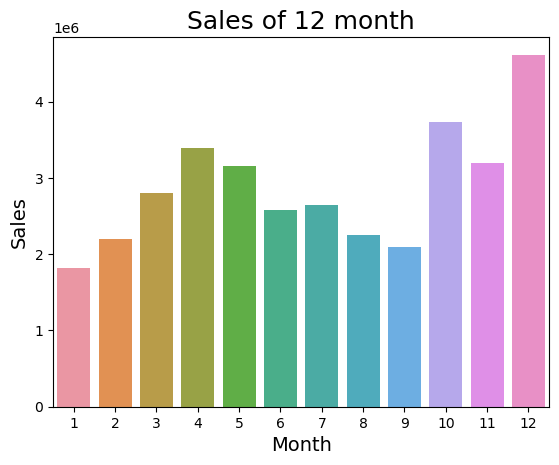

In [428]:
# Trình bày bằng biểu đồ
x = sale_by_month["Month"]
y = sale_by_month["Sales"]
plt.title("Sales of 12 month",fontsize=18)
plt.xlabel("Month",fontsize=14)
plt.ylabel("Sales",fontsize=14)
sns.barplot(x = sale_by_month["Month"],y = sale_by_month["Sales"])
plt.show()


## Task 2 : Thành phố nào bán doanh thu tốt nhất

In [482]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [483]:
def getCity(Address):
    return Address.split(",")[1].strip();

In [484]:
df["City"] = df["Purchase Address"].apply(getCity)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [487]:
sale_by_city = df.groupby("City")[["Sales","Quantity Ordered"]].sum()
sale_by_city

,Sales,Quantity Ordered
City,,
Atlanta,2795498.58,16602
Austin,1819581.75,11153
Boston,3661642.01,22528
Dallas,2767975.40,16730
Los Angeles,5452570.80,33289
New York City,4664317.43,27932
Portland,2320490.61,14053
San Francisco,8262203.91,50239
Seattle,2747755.48,16553


In [489]:
sale_by_city.index

Index(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City',
       'Portland', 'San Francisco', 'Seattle'],
      dtype='object', name='City')

In [490]:
cities = ['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City',
       'Portland', 'San Francisco', 'Seattle']

In [494]:
index_cities = sale_by_city["Sales"].argmax()

In [497]:
print("Thành phố có doanh ty tốt nhất là : {}".format(cities[index_cities]))

Thành phố có doanh ty tốt nhất là : San Francisco


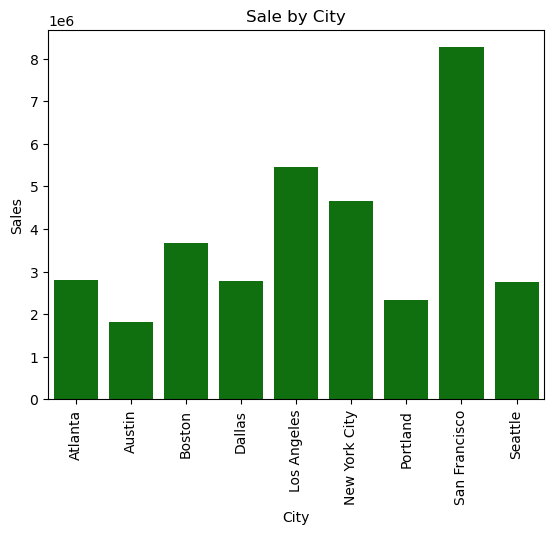

In [510]:
#
x = sale_by_city.index
y = sale_by_city["Sales"]
sns.barplot( x = sale_by_city.index , y = sale_by_city["Sales"],color = "green")
plt.xticks(rotation = 90)
plt.title("Sale by City")
plt.show()

## Task 3 : Thời điểm nào trong ngày nên chạy quảng cáo để tối đa hóa khả năng khách hàng sẽ mua sản phẩm ?
* Trong task này sẽ tìm thời điểm quảng cáo bằng cách tìm ra khung giờ đã bán được nhiều sản phẩm nhất ( Cũng có thể tìm thời điểm quảng cáo dựa trên Doanh thu,  ...  )

In [512]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [516]:
# Chuyển kiểu dữ liệu cột Order Date từ Object qua Datetime
df["Hour"] = pd.to_datetime(df["Order Date"]).dt.hour

C:\Users\buico\AppData\Local\Temp\ipykernel_16164\2714295612.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hour"] = pd.to_datetime(df["Order Date"]).dt.hour


In [517]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [524]:
sale_by_hour = df.groupby(by ="Hour")[["Quantity Ordered"]].sum()
sale_by_hour

,Quantity Ordered
Hour,
0,4428
1,2619
2,1398
3,928
4,937
5,1493
6,2810
7,4556
8,7002


In [525]:
sale_by_hour.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int32', name='Hour')

In [528]:
time = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23]
index_time = sale_by_hour["Quantity Ordered"].argmax()

In [531]:
print("Khung giờ bán được nhiều sản phẩm nhất là {} giờ ".format(time[index_time]))

Khung giờ bán được nhiều sản phẩm nhất là 19 giờ 


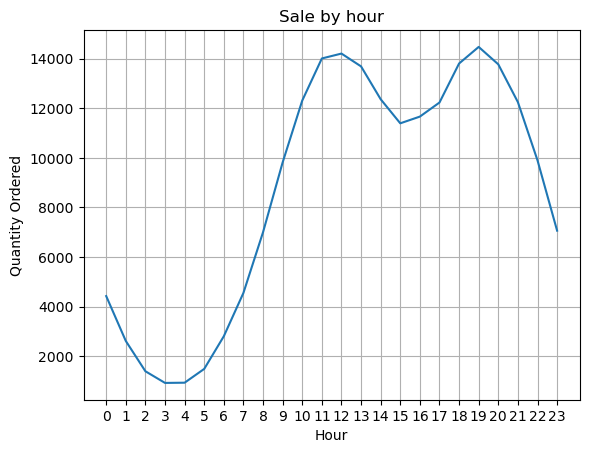

In [546]:
x = sale_by_hour.index
y = sale_by_hour["Quantity Ordered"]
sns.lineplot(x=sale_by_hour.index,y=sale_by_hour["Quantity Ordered"])
plt.title("Sale by hour")
plt.xticks(x)
plt.grid()
plt.show()

### Như vậy chúng ta có thể quảng cáo vào khung giờ từ 12h đến 19h